<a href="https://colab.research.google.com/github/Sebas-GitHub/Spring-boot-Ferreteria/blob/master/Clasifi_Img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CNN.zip to CNN.zip


In [3]:
!pwd

/content


In [5]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['CNN.zip']),'r')
data.extractall()

In [6]:
import cv2 
import numpy as np
import os
import matplotlib.pyplot as plt

perros_folder_path='/content/CNN/bananos'
bananos=[]
img_size=150

for img in os.listdir(perros_folder_path):
  img = cv2.imread(os.path.join(perros_folder_path,img))
  #img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_resize = cv2.resize(img,(img_size,img_size))
  bananos.append(img_resize)

 

In [7]:
bananos = np.array(bananos)
print(bananos.shape)

(10, 150, 150, 3)


In [8]:
import cv2 
import numpy as np
import os
import matplotlib.pyplot as plt

perros_folder_path='/content/CNN/perros'
perrost=[]
img_size=150

for img in os.listdir(perros_folder_path):
  img = cv2.imread(os.path.join(perros_folder_path,img))
  #img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_resize = cv2.resize(img,(img_size,img_size))
  perrost.append(img_resize)

In [9]:
perrost = np.array(perrost)
print(perrost.shape)

(12, 150, 150, 3)


(150, 150, 3)


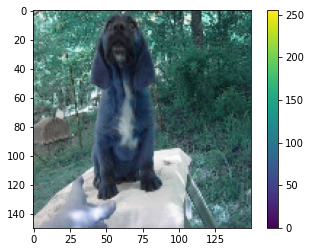

In [10]:
print(perrost[4].shape)
plt.figure()
plt.imshow(np.squeeze(perrost[4]))
plt.colorbar()
plt.grid(False)
plt.show()

(150, 150, 3)


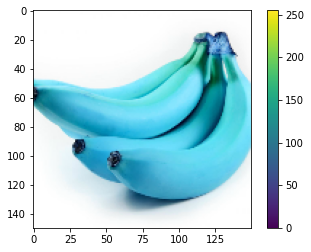

In [11]:
print(bananos[2].shape)
plt.figure()
plt.imshow(np.squeeze(bananos[2]))
plt.colorbar()
plt.grid(False)
plt.show()

**CLASIFICAR**


In [12]:
images = np.concatenate([bananos,perrost])
print(len(images))
images = np.array(images)
print(images.shape)

22
(22, 150, 150, 3)


In [17]:
#etiquetas para bananos representados con 0
etiquetas_bananos = np.repeat(0,10)
print(len(etiquetas_bananos))
print(etiquetas_bananos)

10
[0 0 0 0 0 0 0 0 0 0]


In [13]:
#etiquetas para perros representados con 1
etiquetas_perros = np.repeat(1,12)
print(len(etiquetas_perros))
print(etiquetas_perros)

12
[1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
#nombre de las clases o etiquetas  0 y 1
class_names=['Bananos','Perros']

In [18]:
#imprimir todas las etiquetas de bananos y perros
labels = np.concatenate([etiquetas_bananos,etiquetas_perros])
print(len(labels))
print(labels)
labels = np.array(labels)
print(labels.shape)

22
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
(22,)


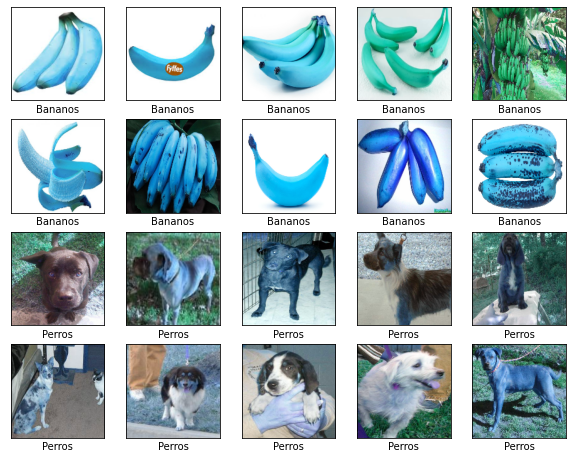

In [19]:
#imprimir los primeros 20 imagenes de nuestra carpeta
plt.figure (figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(images[i])
  plt.xlabel(class_names[labels[i]])
plt.show()

In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(images, labels, epochs=30)
trained=model.fit(images, labels, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 558ms/step - loss: 96.7540 - accuracy: 0.4091
Epoch 2/30
1/1 [==============================] - 0s 45ms/step - loss: 22974.0020 - accuracy: 0.4545
Epoch 3/30
1/1 [==============================] - 0s 51ms/step - loss: 12237.1250 - accuracy: 0.4545
Epoch 4/30
1/1 [==============================] - 0s 46ms/step - loss: 1111.2115 - accuracy: 0.5909
Epoch 5/30
1/1 [==============================] - 0s 53ms/step - loss: 918.4408 - accuracy: 0.5909
Epoch 6/30
1/1 [==============================] - 0s 50ms/step - loss: 2801.1301 - accuracy: 0.4545
Epoch 7/30
1/1 [==============================] - 0s 49ms/step - loss: 2685.2122 - accuracy: 0.4545
Epoch 8/30
1/1 [==============================] - 0s 61ms/step - loss: 127.6833 - accuracy: 0.9091
Epoch 9/30
1/1 [==============================] - 0s 56ms/step - loss: 1834.5646 - accuracy: 0.5455
Epoch 10/30
1/1 [==============================] - 0s 51ms/step - loss: 658.5087 - accuracy: 0.7727
E

In [22]:
img=images[17]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


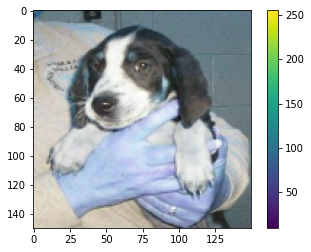

In [23]:
plt.figure()
plt.imshow(images[17])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
prediction_single = model.predict(img)
print(prediction_single)
print(np.sum(prediction_single))
print(np.argmax(prediction_single)) #va agarra el indice mas
print(class_names[np.argmax(prediction_single)])

[[0. 1.]]
1.0
1
Perros
